# Predicting Car Prices

In [71]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)


In [72]:
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Missing column names. Possibly due to how old the data is.

In [73]:
cars.columns = ["symboling","normalized_losses","make","fuel_type","aspiration","num_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

Replace "?" (unknown) values with numpy.nan

In [74]:
cars.replace("?", np.nan, inplace=True)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [75]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized_losses    164 non-null object
make                 204 non-null object
fuel_type            204 non-null object
aspiration           204 non-null object
num_doors            202 non-null object
body_style           204 non-null object
drive_wheels         204 non-null object
engine_location      204 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_type          204 non-null object
num_cylinders        204 non-null object
engine_size          204 non-null int64
fuel_system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression_ratio    204 non-null float64
horsepower           202 non-nul

Replacing missing values in "normalized_losses" with the group average.

In [76]:
norm_losses_mean = cars[cars["normalized_losses"].notnull()]["normalized_losses"].astype("int").mean()
cars.loc[cars["normalized_losses"].isnull(),["normalized_losses"]] = norm_losses_mean


Since 'Price' is a sensitive information (the target attribute) and there are only 4 rows containing a null, I've decided to remove them.

In [77]:
# show rows containing Nan
cars.dropna(subset=["price"], inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 26 columns):
symboling            200 non-null int64
normalized_losses    200 non-null object
make                 200 non-null object
fuel_type            200 non-null object
aspiration           200 non-null object
num_doors            198 non-null object
body_style           200 non-null object
drive_wheels         200 non-null object
engine_location      200 non-null object
wheel_base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb_weight          200 non-null int64
engine_type          200 non-null object
num_cylinders        200 non-null object
engine_size          200 non-null int64
fuel_system          200 non-null object
bore                 196 non-null object
stroke               196 non-null object
compression_ratio    200 non-null float64
horsepower           198 non-nul

There are two distinct values in 'num_doors': 'two' and 'four'. Rows missing values in 'num_doors' will be have 'four' which is the more frequent.

In [78]:
cars["num_doors"].value_counts(dropna=False)

four    113
two      85
NaN       2
Name: num_doors, dtype: int64

In [79]:
cars.loc[cars["num_doors"].isnull(),["num_doors"]] = "four"

In [80]:
cars["num_doors"].value_counts(dropna=False)

four    115
two      85
Name: num_doors, dtype: int64

After a research, I've found out the reason the 4 cars are missing 'bore' and 'stroke' values is got to do with their engine type. 'bore' and 'stroke' vales are associated with the sizes of pistons inside the engines. The 4 cars have a special type of engine, 'rotor', which do not contain any cylinders. 

Since 'bore' and 'stroke' values seem too specific and irrelevant for our use, these columns will be dropped. 

In [81]:
cars[cars["bore"].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [82]:
cars.drop(labels=["bore","stroke"], axis=1, inplace=True)

Fill missing values of 'horsepower' and 'peak_rpm" with group average.

In [83]:
hp_avg = cars.loc[cars["horsepower"].notnull()]["horsepower"].astype("int").mean().round()
peak_rpm_avg = cars.loc[cars["peak_rpm"].notnull()]["peak_rpm"].astype("int").mean().round()

cars.loc[cars["horsepower"].isnull(), ["horsepower"]] = hp_avg
cars.loc[cars["peak_rpm"].isnull(), ["peak_rpm"]] = peak_rpm_avg


In [84]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 24 columns):
symboling            200 non-null int64
normalized_losses    200 non-null object
make                 200 non-null object
fuel_type            200 non-null object
aspiration           200 non-null object
num_doors            200 non-null object
body_style           200 non-null object
drive_wheels         200 non-null object
engine_location      200 non-null object
wheel_base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb_weight          200 non-null int64
engine_type          200 non-null object
num_cylinders        200 non-null object
engine_size          200 non-null int64
fuel_system          200 non-null object
compression_ratio    200 non-null float64
horsepower           200 non-null object
peak_rpm             200 non-null object
city_mpg             200 non-nul

Now the missing values have been dealt with, appropriate column types will be attributed to each column.

'num_doors' and 'num_cylinders' are in alphabet format. I'll change them to numerical value and then change the column type.

In [85]:
cars["num_doors"].unique()

array(['two', 'four'], dtype=object)

In [86]:
cars["num_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [87]:
map_dict = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}

cars["num_doors"] = cars["num_doors"].map(map_dict)
cars["num_cylinders"] = cars["num_cylinders"].map(map_dict)

In [88]:
# Change column types
int_cols = ["normalized_losses", "horsepower", "peak_rpm", "price", "num_doors", "num_cylinders"]

cars[int_cols] = cars[int_cols].astype("int")
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 24 columns):
symboling            200 non-null int64
normalized_losses    200 non-null int64
make                 200 non-null object
fuel_type            200 non-null object
aspiration           200 non-null object
num_doors            200 non-null int64
body_style           200 non-null object
drive_wheels         200 non-null object
engine_location      200 non-null object
wheel_base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb_weight          200 non-null int64
engine_type          200 non-null object
num_cylinders        200 non-null int64
engine_size          200 non-null int64
fuel_system          200 non-null object
compression_ratio    200 non-null float64
horsepower           200 non-null int64
peak_rpm             200 non-null int64
city_mpg             200 non-null int

Time to normalize all the numeric columns.

In [94]:
numeric_cols = ["symboling", "normalized_losses", "num_doors", "wheel_base", "length", 
                "width", "height", "curb_weight", "num_cylinders", "engine_size", "compression_ratio", 
                "horsepower", "peak_rpm", "city_mpg", "highway_mpg"]

# Normalizing numeric values so they range from 0 to 1
cars_numeric = cars[numeric_cols]
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())

cars_numeric["price"] = cars["price"]

cars_numeric.index = range(0,len(cars_numeric))
cars_numeric

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.125000,0.294393,0.346939,0.222222,0.289474,16500
1,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.125000,0.495327,0.346939,0.166667,0.263158,16500
2,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.187500,0.252336,0.551020,0.305556,0.368421,13950
3,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.062500,0.313084,0.551020,0.138889,0.157895,17450
4,0.8,0.298429,0.0,0.384840,0.540299,0.512821,0.441667,0.395268,0.3,0.283019,0.093750,0.289720,0.551020,0.166667,0.236842,15250
5,0.6,0.486911,1.0,0.559767,0.770149,0.948718,0.658333,0.525989,0.3,0.283019,0.093750,0.289720,0.551020,0.166667,0.236842,17710
6,0.6,0.298429,1.0,0.559767,0.770149,0.948718,0.658333,0.568658,0.3,0.283019,0.093750,0.289720,0.551020,0.166667,0.236842,18920
7,0.6,0.486911,1.0,0.559767,0.770149,0.948718,0.675000,0.619860,0.3,0.264151,0.081250,0.429907,0.551020,0.111111,0.105263,23875
8,0.8,0.664921,0.0,0.425656,0.532836,0.384615,0.541667,0.351823,0.2,0.177358,0.112500,0.247664,0.673469,0.277778,0.342105,16430
9,0.4,0.664921,1.0,0.425656,0.532836,0.384615,0.541667,0.351823,0.2,0.177358,0.112500,0.247664,0.673469,0.277778,0.342105,16925


## Univariate Model Testing

Calculating RMSE for predictions based on k-nearest neighborhood models for 'k's 1,3,5,7,9.

In [98]:
def knn_train_test(train_cols, target_col, df):
    # shuffle row ordering
    np.random.seed(1)
    df = df.reindex(np.random.permutation(len(df)))
    
    # Split the df by half into train and test sets
    split = round(df.shape[0]/2)
    
    train_df = df[:split]
    test_df = df[split:]
    
    # Dictionary to store RMSEs based on varying k values
    ks_rmse = {}
    
    # Caculate RMSE for every k
    for k in range(1,10,2):
        knn = KNeighborsRegressor(n_neighbors = k)

        # Separate target column from feature columns
        train_features = train_df[train_cols]
        train_target = train_df[target_col]

        # Fit the KNN regressor
        knn.fit(train_features, train_target)

        # Get predictions
        predictions = knn.predict(test_df[train_cols])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        ks_rmse[k] = rmse

    return ks_rmse

In [101]:
horsepower = knn_train_test(["horsepower"], ["price"], cars_numeric)
horsepower

{1: 4183.096630487993,
 3: 4176.022383933198,
 5: 4421.292645686327,
 7: 4658.0497482468845,
 9: 4591.4584980438685}

In [112]:
cols_list = list(cars_numeric.columns)
cols_list.remove("price")
print(cols_list)

['symboling', 'normalized_losses', 'num_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_cylinders', 'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


In [114]:
# Dictionary to store key:column, value:RMSEs for k=1,3,5,7,9
cols_rmses = {}

for col in cols_list:
    ks_dict = knn_train_test([col], ["price"], cars_numeric)
    cols_rmses[col] = ks_dict

cols_rmses

{'city_mpg': {1: 4170.034286429789,
  3: 3438.0091973569693,
  5: 3813.193148373158,
  7: 3706.737982542668,
  9: 3811.0390099593706},
 'compression_ratio': {1: 7344.202947903877,
  3: 5943.417906577177,
  5: 7193.5885991346495,
  7: 7540.580427735179,
  9: 7180.410828835924},
 'curb_weight': {1: 4390.877922466076,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'engine_size': {1: 3398.1555291069303,
  3: 3143.6417681833063,
  5: 3247.180990459263,
  7: 3058.254836187008,
  9: 3141.6475726897906},
 'height': {1: 10910.35914761746,
  3: 7805.349593138741,
  5: 7380.628859304605,
  7: 7272.536203121596,
  9: 7121.205659190993},
 'highway_mpg': {1: 3667.7066335790814,
  3: 3602.7490403548477,
  5: 3737.1620469013646,
  7: 3963.0230166902043,
  9: 3972.4730855050143},
 'horsepower': {1: 4183.096630487993,
  3: 4176.022383933198,
  5: 4421.292645686327,
  7: 4658.0497482468845,
  9: 4591.4584980438685},
 'length': {1: 6487.918747179253,
 

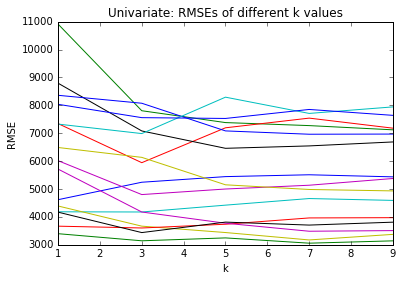

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [x for x in range(1,10,2)]

for col, rmses in cols_rmses.items():
    y = []
    for xval in x:
        y.append(rmses[xval])
    plt.xlabel("k")
    plt.ylabel("RMSE")
    plt.title("Univariate: RMSEs of different k values")
    plt.plot(x,y)
    
    
    


## Multivariate Model Testing

Choosing the Top-2 columns from previous testing.

In [136]:
avg_rmses = {}

for col, rmse in cols_rmses.items():
    avg = np.mean(list(rmse.values()))
    avg_rmses[col] = avg
    
series_avg_rmses = pd.Series(avg_rmses)
sorted_avg_rmses = series_avg_rmses.sort_values()
print(sorted_avg_rmses)


engine_size          3197.776139
curb_weight          3609.298099
city_mpg             3787.802725
highway_mpg          3788.622765
width                4131.406807
horsepower           4405.983981
wheel_base           5249.730986
num_cylinders        5265.238884
length               5537.461758
compression_ratio    7040.440142
peak_rpm             7112.435583
symboling            7489.297612
normalized_losses    7651.230485
num_doors            7722.554554
height               8098.015892
dtype: float64


In [137]:
def knn_multiple_train_test(train_cols, target_col, df):
    # shuffle row ordering
    np.random.seed(1)
    df = df.reindex(np.random.permutation(len(df)))
    
    # Split the df by half into train and test sets
    split = round(df.shape[0]/2)
    
    train_df = df[:split]
    test_df = df[split:]
    
    # fit KNN
    knn = KNeighborsRegressor()

    # Separate target column from feature columns
    train_features = train_df[train_cols]
    train_target = train_df[target_col]

    # Fit the KNN regressor
    knn.fit(train_features, train_target)

    # Get predictions
    predictions = knn.predict(test_df[train_cols])

    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)


    return rmse

In [143]:
top_columns = list(sorted_avg_rmses.index)
ncols_rmses = {}

for n in range(2,7):
    train_cols = top_columns[0:n]
    rmse = knn_multiple_train_test(train_cols, ["price"], cars_numeric)
    ncols_rmses[n] = rmse

ncols_rmses = pd.Series(ncols_rmses)
print(ncols_rmses)

2    2776.788724
3    3007.348603
4    3207.312403
5    2660.144132
6    2725.797331
dtype: float64


The best 3 models each contain 2,5,6 top attributes.

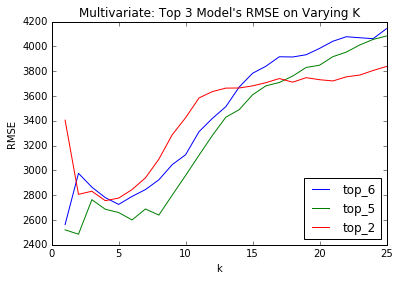

In [154]:
def knn_multiple_train_test(train_cols, target_col, df):
    # shuffle row ordering
    np.random.seed(1)
    df = df.reindex(np.random.permutation(len(df)))
    
    # Split the df by half into train and test sets
    split = round(df.shape[0]/2)
    
    train_df = df[:split]
    test_df = df[split:]
    
    # Separate target column from feature columns
    train_features = train_df[train_cols]
    train_target = train_df[target_col]
    
    k_rmses = {}
    
    for k in range(1, 26):
        # fit KNN
        knn = KNeighborsRegressor(n_neighbors = k)

        # Fit the KNN regressor
        knn.fit(train_features, train_target)

        # Get predictions
        predictions = knn.predict(test_df[train_cols])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        # Append to k_rmses dictionary
        k_rmses[k] = rmse

    return k_rmses

models = ["top_2", "top_5", "top_6"]
models_ks_rmses = {}

for model in models:
    models_ks_rmses[model] = knn_multiple_train_test(top_columns[:int(model[-1])], ["price"], cars_numeric)

x = [x for x in range(1,26)]
for model, ks_rmses in models_ks_rmses.items():
    y = []
    for xval in x:
        y.append(ks_rmses[xval])
    
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.title("Multivariate: Top 3 Model's RMSE on Varying K")
    plt.plot(x,y, label="{}".format(model))
    plt.legend(loc=4)

RMSE seems to generally increase as k gets larger. This is because the each k'th neighbor is most likely to be further than k-1'th neighbor which contributes to higher RMSE.